In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In C:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
file = pd.read_excel('C:/Users/Harshit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',
                     sheet = ['Title Sheet','Transactions','NewCustomerList','CustomerDemographic',
                              'CustomerAddress'])

In [3]:
TitleSheet = pd.read_excel('C:/Users/Harshit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name =
                     'TitleSheet')
Transactions = pd.read_excel('C:/Users/Harshit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name =
                     'Transactions')
NewCustomerList = pd.read_excel('C:/Users/Harshit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name =
                     'NewCustomerList')
CustomerDemographic = pd.read_excel('C:/Users/Harshit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name =
                     'CustomerDemographic')
CustomerAddress = pd.read_excel('C:/Users/Harshit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name =
                     'CustomerAddress')

In [4]:
#Let's start with Transactions
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [6]:
#convert date columns from integer to datetime
Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'], unit='s')
Transactions['transaction_date'].head()

0   2017-02-25
1   2017-05-21
2   2017-10-16
3   2017-08-31
4   2017-10-01
Name: transaction_date, dtype: datetime64[ns]

In [7]:
#convert date columns from integer to datetime
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='s')
Transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [8]:
Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [9]:
#identify missing values
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [10]:
duplicates = Transactions.duplicated()
Transactions[duplicates].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [11]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [12]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [13]:
Transactions['product_line'].value_counts()


Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [14]:
Transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [15]:
Transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [16]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.10,1.375,1.71875,1.460938,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.00,1.000,1.25000,1.062500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.07,1.070,1.07000,1.070000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.64,0.800,0.80000,0.800000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.93,0.930,1.16250,1.162500,4,4,1.703125


In [17]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [18]:
# Drop Unnamed Column
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
NewCustomerList = NewCustomerList.drop(cols, axis=1)

In [19]:
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [20]:
# Checking for duplicate values
NewCustomerList.duplicated().sum()

0

In [21]:

NewCustomerList['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [22]:
NewCustomerList['gender'].str.replace('U','Unspecified')

0             Male
1             Male
2           Female
3           Female
4           Female
5           Female
6             Male
7           Female
8             Male
9             Male
10            Male
11            Male
12            Male
13          Female
14          Female
15            Male
16          Female
17          Female
18          Female
19          Female
20            Male
21            Male
22            Male
23          Female
24          Female
25            Male
26          Female
27          Female
28          Female
29          Female
          ...     
970         Female
971         Female
972           Male
973         Female
974         Female
975           Male
976           Male
977         Female
978           Male
979           Male
980         Female
981         Female
982           Male
983         Female
984    Unspecified
985         Female
986           Male
987         Female
988         Female
989         Female
990         Female
991         

In [23]:
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'], unit='s')
NewCustomerList['DOB'].describe()

count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

In [24]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0


In [25]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


10.801392785584977


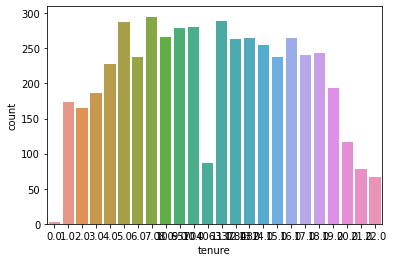

In [61]:
CustomerDemographic['tenure']=CustomerDemographic['tenure'].fillna(CustomerDemographic['tenure'].mean())
sns.countplot(CustomerDemographic['tenure'])
print(CustomerDemographic['tenure'].mean())

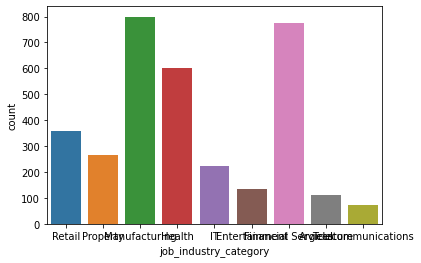

In [28]:
sns.countplot(CustomerDemographic['job_industry_category'])

In [29]:
CustomerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

In [30]:

# Replace inconsistent values with appropriate values
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64


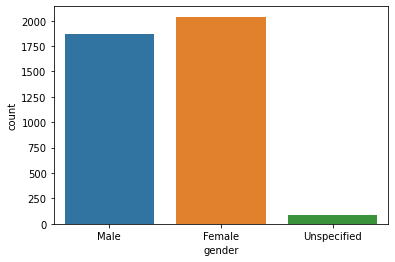

In [31]:
print(CustomerDemographic['gender'].value_counts())
sns.countplot(CustomerDemographic['gender'])

In [32]:

NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [33]:
CustomerDemographic['customer_id'].iloc[-1]

3998

In [34]:
NewCustomerList.insert(0, 'customer_id', range(3999, 3999 + len(NewCustomerList)))

In [35]:
NewCustomerList.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,3999,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,4000,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,4001,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,4002,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,4003,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [36]:
CustomerDemographic.sort_values(by=['customer_id'], inplace=True)

In [37]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
13,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2517,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
27,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
527,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
1919,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [38]:
new_df = pd.concat([CustomerDemographic, NewCustomerList], ignore_index=True, sort=False)

In [39]:
new_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
CustomerDemographic = new_df

In [41]:
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
current_year=2020
for i in CustomerDemographic['DOB']:
    CustomerDemographic['age']=current_year - pd.DatetimeIndex(CustomerDemographic['DOB']).year

In [58]:
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,...,Yes,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,...,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,...,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,...,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,...,Yes,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0


In [44]:
print(min(CustomerDemographic['age']))


18.0


In [45]:
select = CustomerDemographic.loc[CustomerDemographic['age'] == 177.0]
print (select)
CustomerDemographic.drop([33],inplace=True)
print(max(CustomerDemographic['age']))

    customer_id first_name last_name       gender  \
33           34   Jephthah  Bachmann  Unspecified   

    past_3_years_bike_related_purchases        DOB        job_title  \
33                                   59 1843-12-21  Legal Assistant   

   job_industry_category     wealth_segment deceased_indicator  ...    \
33                    IT  Affluent Customer                  N  ...     

   owns_car tenure  address postcode  state country property_valuation  Rank  \
33       No   20.0      NaN      NaN    NaN     NaN                NaN   NaN   

    Value    age  
33    NaN  177.0  

[1 rows x 21 columns]
89.0


In [46]:
x1 = CustomerDemographic[(CustomerDemographic['age'] <= 30)]
x1 = len(x1)

x2 = CustomerDemographic[(CustomerDemographic['age']>30)&(CustomerDemographic['age']<60)]
x2 = len(x2)

x3 = CustomerDemographic[(CustomerDemographic['age'] >= 60)]
x3 =len(x3)

In [47]:
m1 = CustomerDemographic[(CustomerDemographic['age'] <= 30) & 
          (CustomerDemographic['gender']=='Male')] 
m1 = len(m1)

m2 = CustomerDemographic[(CustomerDemographic['age']>30) &(CustomerDemographic['age']<60) & 
          (CustomerDemographic['gender']=='Male')] 
m2 = len(m2)

m3 = CustomerDemographic[(CustomerDemographic['age'] >= 60) & 
          (CustomerDemographic['gender']=='Male')] 
m3 = len(m3)

In [48]:
f1 = CustomerDemographic[(CustomerDemographic['age'] <= 30) & 
          (CustomerDemographic['gender']=='Female')] 
f1 = len(f1)

f2 = CustomerDemographic[(CustomerDemographic['age']>30) &(CustomerDemographic['age']<60) & 
          (CustomerDemographic['gender']=='Female')] 
f2 = len(f2)

f3 = CustomerDemographic[(CustomerDemographic['age'] >= 60) & 
          (CustomerDemographic['gender']=='Female')] 
f3 =len(f3)

In [49]:
X = ['Under 30', 'Between 30 and 60', 'Over 60']
x = [x1, x2, x3]

M = ['Under 30', 'Between 30 and 60', 'Over 60']
m = [m1, m2, m3]

F = ['Under 30', 'Between 30 and 60', 'Over 60']
f = [f1, f2, f3]


Text(2.1, 3000, 'Total')

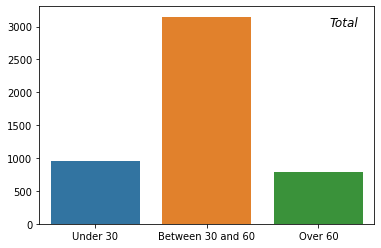

In [50]:
sns.barplot(X,x)
plt.text(2.1,3000, "Total", fontsize = 12, color='Black', fontstyle='italic')

Text(2.1, 1400, 'Male')

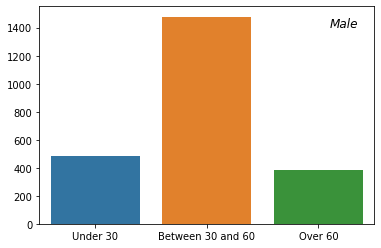

In [51]:
sns.barplot(M,m)
plt.text(2.1,1400, "Male", fontsize = 12, color='Black', fontstyle='italic')

Text(1.98, 1600, 'Female')

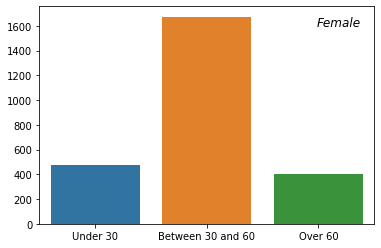

In [52]:

sns.barplot(x = F,y = f)
plt.text(1.98,1600, "Female", fontsize = 12, color='Black', fontstyle='italic')

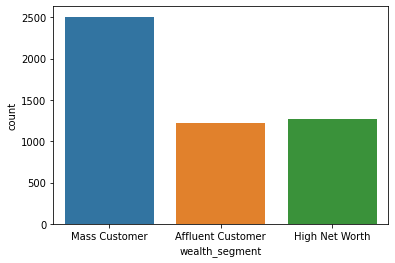

In [53]:

sns.countplot(CustomerDemographic['wealth_segment'])


